
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the [GitHub installation](https://github.com/Narayana-Rao/polsartools).

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




#### import required packages

In [1]:
import polsartools as pst
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
def read_rst(file):
    ds = gdal.Open(file)
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    arr[arr==0] = np.nan
    return arr


def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    # Function to compute vmin and vmax based on nanpercentiles
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]  # Remove NaNs
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax
    
    # Number of images to plot
    num_images = len(filenames)

    # Calculate the number of rows and columns
    ncols = min(max_cols, num_images)  # Use max_cols but limit it to num_images
    nrows = np.ceil(num_images / ncols).astype(int)  # Calculate number of rows

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten() 

    for i, filename in enumerate(filenames):
        data = read_rst(filename)  # Load the data from the file
        vmin, vmax = compute_vmin_vmax(data)
        ax = axes[i]
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filename))
        fig.colorbar(im, ax=ax)

    # Turn off any unused axes
    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

#### Read and Extract Single-look S-matrix
Sample dataset downloaded from :
https://ietr-lab.univ-rennes1.fr/polsarpro-bio/san-francisco/dataset/SAN_FRANCISCO_RISAT.zip

In [2]:
prod_dir = '163791211'
pst.risat_l11(prod_dir,matrixType='Sxy')
# or if you need a C2 use the following
# pst.risat_l11(prod_dir,matrixType='C2',azlks=10,rglks=7)

Detected FRS1: ['RV', 'RH'] acquired on 09-AUG-2016
Saved file: 163791211\inc.tif
Saved file: 163791211\Sxy\s11.tif
Saved file: 163791211\Sxy\s21.tif
Execution time for risat_l11: 02:43 (min:sec)


#### Extract Stokes parameters

In [3]:
sxx_File = r'163791211\Sxy\s11.tif'
sxy_File = r'163791211\Sxy\s21.tif'
pst.stokes_parm(sxx_File,sxy_File,window_size=5)

Progress: 100%|███████████████████████████████████████████████████████████████████| 504/504 [03:15<00:00,  2.58block/s]


Saved file 163791211\Sxy\stokes_g0.tif
Saved file 163791211\Sxy\stokes_g1.tif
Saved file 163791211\Sxy\stokes_g2.tif
Saved file 163791211\Sxy\stokes_g3.tif
Saved file 163791211\Sxy\stokes_e1.tif
Saved file 163791211\Sxy\stokes_e2.tif
Saved file 163791211\Sxy\stokes_e1norm.tif
Saved file 163791211\Sxy\stokes_e2norm.tif
Saved file 163791211\Sxy\stokes_phi.tif
Saved file 163791211\Sxy\stokes_tau.tif
Saved file 163791211\Sxy\stokes_x_poincare.tif
Saved file 163791211\Sxy\stokes_y_poincare.tif
Saved file 163791211\Sxy\stokes_H.tif
Saved file 163791211\Sxy\stokes_A.tif
Saved file 163791211\Sxy\stokes_contrast.tif
Saved file 163791211\Sxy\stokes_DoLP.tif
Saved file 163791211\Sxy\stokes_DoCP.tif
Saved file 163791211\Sxy\stokes_LPR.tif
Saved file 163791211\Sxy\stokes_CPR.tif
Execution time for stokes_parm: 07:40 (min:sec)


#### Display stokes parameters

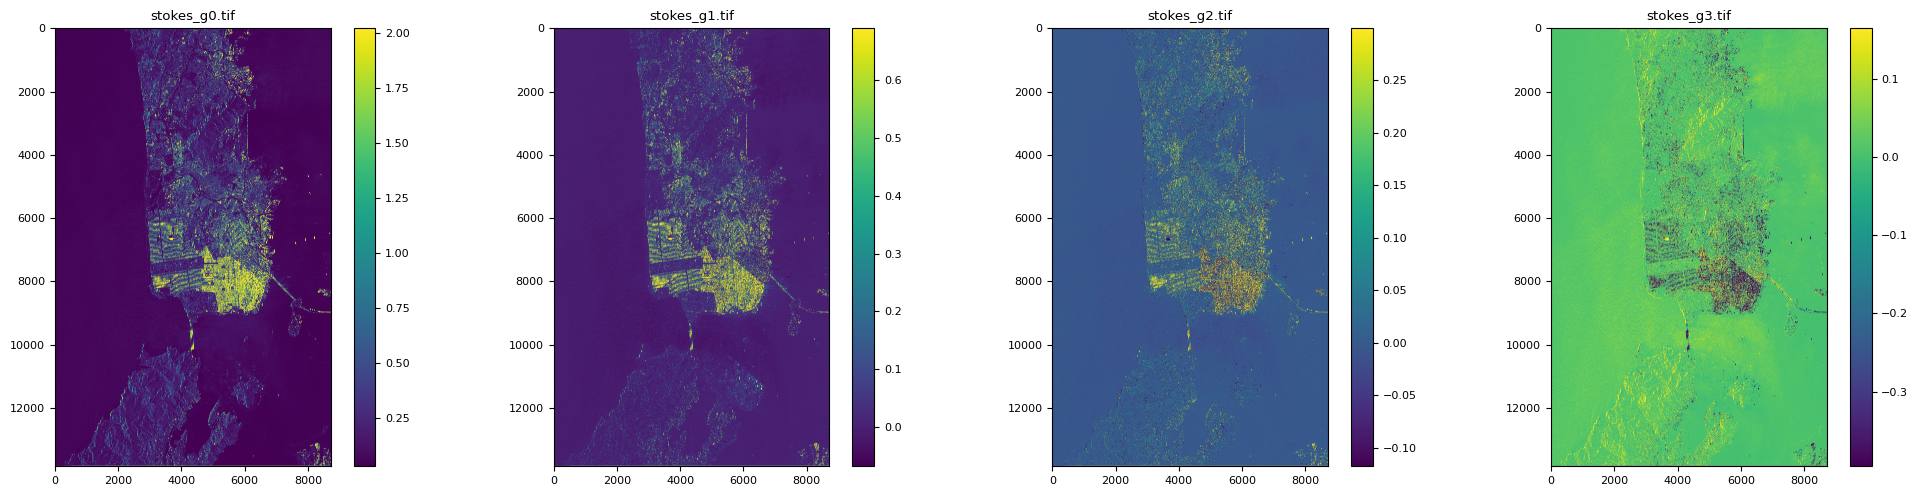

In [5]:
inFolder = r'163791211\Sxy'
plot_images(os.path.join(inFolder,'stokes_g0.tif'),
            os.path.join(inFolder,'stokes_g1.tif'),
            os.path.join(inFolder,'stokes_g2.tif'),
            os.path.join(inFolder,'stokes_g3.tif'),
           )



#### Display Linear Polarization Ratio (LPR) and Circular Polarization Ratio (CPR)

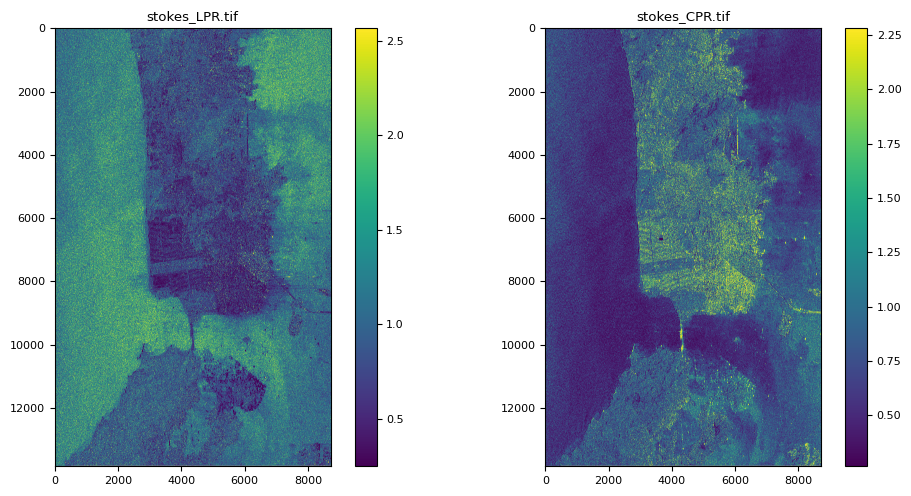

In [6]:

plot_images(os.path.join(inFolder,'stokes_LPR.tif'),
            os.path.join(inFolder,'stokes_CPR.tif'))


#### Convert S-matrix to multi-looked C-matrix

In [7]:
inFolder = '163791211\Sxy'
pst.convert_S(inFolder,matrixType='C2',azlks=10,rglks=7)

Progress: 100%|███████████████████████████████████████████████████████████████████| 504/504 [00:52<00:00,  9.54block/s]


Saved file 163791211\Sxy\C2\C11.tif
Saved file 163791211\Sxy\C2\C12_real.tif
Saved file 163791211\Sxy\C2\C12_imag.tif
Saved file 163791211\Sxy\C2\C22.tif
Execution time for convert_S: 01:14 (min:sec)


#### Generate a quick look RGB

RGB image saved as 163791211\Sxy\C2\RGB1.png
Execution time for dxpRGB: 1.00 seconds


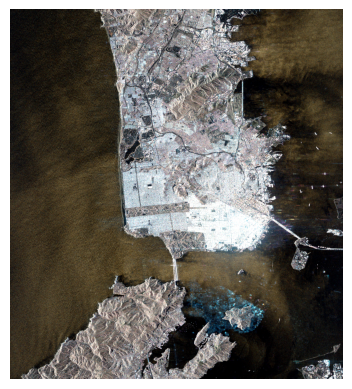

In [8]:
pst.dxpRGB('163791211\Sxy\C2')

#### Generate Degree of polarization (DoP) and Compact-pol Radar Vegetataion Index (CpRVI)

In [9]:

c2Folder = '163791211\Sxy\C2'
pst.dopcp(c2Folder,window_size=5)
pst.cprvi(c2Folder,window_size=5)

Progress: 100%|███████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.24block/s]


Saved file 163791211\Sxy\C2\dopcp.tif
Execution time for dopcp: 4.00 seconds


Progress: 100%|███████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  2.00block/s]


Saved file 163791211\Sxy\C2\cprvi.tif
Execution time for cprvi: 5.00 seconds


#### Display Degree of polarization (DoP) and Compact-pol Radar Vegetataion Index (CpRVI)

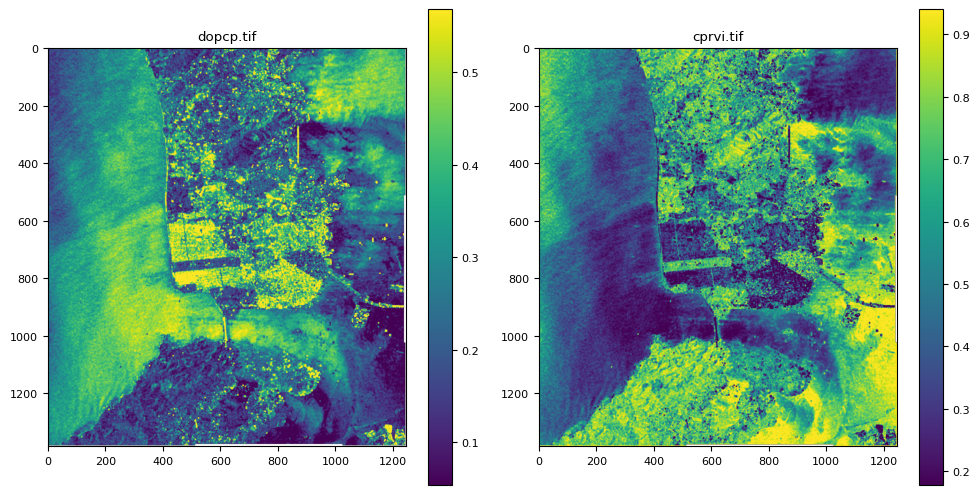

In [10]:


plot_images(os.path.join(c2Folder,'dopcp.tif'),os.path.join(c2Folder,'cprvi.tif'))

